In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split


In [2]:
#Wrangling----------------------------------------------------------------------------------------------------------------------

In [3]:
#1Merge datasets

# Load the datasets
customer_profiles = pd.read_csv("customer_profiles.csv")
ad_events = pd.read_csv("ad_events.csv")

# Merge the datasets on the 'id' and 'customer' columns using left join
merged_data = pd.merge(customer_profiles, ad_events, left_on='id', right_on='customer', how='left')

# For non-matching rows, fill in NaN values with the corresponding 'id' or 'customer' value
merged_data['customer'].fillna(merged_data['id'], inplace=True)
merged_data['id'].fillna(merged_data['customer'], inplace=True)


dfO=merged_data


In [26]:
#split numerical parts of dataframe
df = pd.DataFrame((((dfO.drop('id', axis=1)).drop('home_state', axis=1)).drop('event', axis=1)).drop('event_info', axis=1))

# Make float dataset
df1 = {}

# Extract year, month, and day from "became_member_on (year month day)"
df1["year"] = df["became_member_on (year month day)"].apply(lambda x: float(str(x)[:4]) if pd.notnull(x) and len(str(x)) == 5 else 0)
df1["month"] = df["became_member_on (year month day)"].apply(lambda x: float(str(x)[4:6]) if pd.notnull(x) and len(str(x)) == 3 else 0)
df1["day"] = df["became_member_on (year month day)"].apply(lambda x: float(str(x)[6:8]) if pd.notnull(x) and len(str(x)) == 3 else 0)

# Other columns
df1["gender"] = df["gender"].map({'F': 0.0, 'M': 1.0}).fillna(0.5790270890798996)
df1["ever_married"] = df["ever_married"].map({'No': 0.0, 'Yes': 1.0}).fillna(0.5247599943435656)
df1["time"] = df["time"].apply(lambda x: float(x) if pd.notnull(x) else 366.6747497813369)
df1["age"] = df["age"].apply(lambda x: float(x) if pd.notnull(x) else 53.81169310700612)
df1["income"] = df["income"].apply(lambda x: float(x) if pd.notnull(x) else 64304.72993144192)
df1["kids"] = df["kids"].apply(lambda x: float(x) if pd.notnull(x) else 1.692206166561045)

# Create a new DataFrame
df = (pd.DataFrame(df1))
print((df["year"]).mean())
df=(((df.drop('year', axis=1)).drop('month', axis=1)).drop('day', axis=1))

0.0


In [28]:
# Import stuff needed
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
from sklearn.cluster import KMeans
#Scale down data
scaled_df = pd.DataFrame(scaler.fit_transform(df))

In [6]:
#2 Split data into testing and training
#df0=dfO
#--------------------------------------------------------------------------------------------------------------------------


# Assuming dfO is your original dataframe
#train_df, test_df = train_test_split(df, test_size=0.5, random_state=42)

# train_df will contain 70% of the data
# test_df will contain 30% of the data

In [7]:
#len(train_df)

In [8]:
#df.info()
train_df.head()

NameError: name 'train_df' is not defined

In [ ]:
#KMeans--------------------------------------------------------------------------------------------------------------------

In [ ]:
#1get data
#df = pd.read_csv("demo.csv")
train_df.describe()

In [29]:
#make inertias stuff
inertias = []

for cluster in range(1,10):
    kmeans = KMeans(n_clusters=cluster)
    kmeans.fit(scaled_df)
    inertias.append(kmeans.inertia_)
    print("Inertia",cluster,"is Done with a value of", inertias[len(inertias)-1])
print(inertias)

Inertia 1 is Done with a value of 1636571.999999999
Inertia 2 is Done with a value of 1349318.5385060804
Inertia 3 is Done with a value of 1193671.2600598012
Inertia 4 is Done with a value of 1076446.485119152
Inertia 5 is Done with a value of 1002802.7290814307
Inertia 6 is Done with a value of 937470.8718728588
Inertia 7 is Done with a value of 887318.8445835501
Inertia 8 is Done with a value of 843112.7423637251
Inertia 9 is Done with a value of 802160.6466165627
[1636571.999999999, 1349318.5385060804, 1193671.2600598012, 1076446.485119152, 1002802.7290814307, 937470.8718728588, 887318.8445835501, 843112.7423637251, 802160.6466165627]


In [30]:
#Make dataframe from different inertias
#inertias=[1145598.0000000002, 944620.615710496, 833189.835514712, 757108.9124547339, 705390.8667514288, 662314.7893677704, 621151.4441061104, 591918.6666079389, 560450.2019474326]
#inertias=[1145598.0000000002, 954622.2228949122, 835828.6630763641, 753611.8224013351, 701858.3005560208, 661857.8963748092, 620916.0137849337, 588766.298946556, 561778.2266748617, 534038.7886788611, 508781.5868788475, 490211.7670320037, 470012.3588045053, 452270.20359596284, 438666.42648994265, 424281.97625126934, 411107.16252809006, 400712.1966292795, 389277.148592346]
#[1145598.0000000002, 944620.4879980213, 833189.835514712, 757105.1372175596, 1855.599524803, 660766.065844349, 621175.7966590136, 589652.0870446172, 559541.0175728451, 533721.9416400897, 508608.22558248695, 489322.65078762406, 469758.50736622914, 454183.61242478795, 438751.60391558724, 423218.6507657984, 410516.37791395595, 398070.2037032597, 389019.64862946374,378650.11186597566, 369663.61030112446, 359150.9304597364, 352067.6304229872, 343174.15143631457, 336562.8989989955, 328411.42419330816, 322348.4715293704, 315991.59804975474, 309112.8822062926,304673.39973046177, 297819.53280959785, 293304.73362911626, 286961.97868700855, 283192.5629138535, 278601.29181489075, 274371.4614720637, 270234.4773811805, 266364.3180101956, 263757.228360014]


frame = pd.DataFrame({"Clusters":range(1,10), "Inertias": inertias})
#print(inertias)



<AxesSubplot:xlabel='Clusters', ylabel='Inertias'>

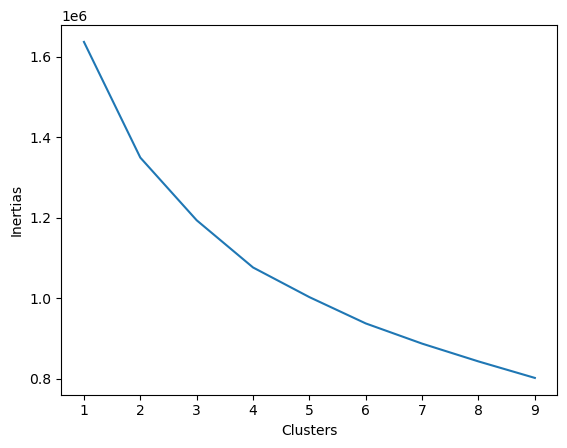

In [31]:
#3 View it
import seaborn as sns
sns.lineplot(data=frame, x="Clusters", y="Inertias")

In [32]:
# official algorithm
kmeans = KMeans(n_clusters=4)
kmeans.fit(scaled_df)
predictions = kmeans.predict(scaled_df)

#get the centers
centers = kmeans.cluster_centers_
unscaled_centers = scaler.inverse_transform(centers)

In [ ]:
#test
y_pred=predictions
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(scaled_df, y_pred)
print(f"Silhouette Score: {silhouette_avg}")

In [34]:
import numpy as np
#get the amount in each catagory
labels = kmeans.labels_

# Count the number of points in each cluster
unique_labels, counts = np.unique(labels, return_counts=True)

# Display the result
for cluster, count in zip(unique_labels, counts):
    print(f"Cluster {cluster}: {count} points")

# If you want to see the labels assigned to each data point
#print("Labels assigned to each data point:", labels)

Cluster 0: 71826 points
Cluster 1: 60836 points
Cluster 2: 79383 points
Cluster 3: 60717 points


In [35]:
df_sort = pd.DataFrame({'Point': [tuple(point) for point in scaled_df], 'Cluster': labels})

# Pivot the DataFrame to have separate columns for each cluster
pivot_df = df_sort.pivot_table(index=df_sort.index, columns='Cluster', values='Point', aggfunc=lambda x: list(x))

# Rename the columns for better readability
pivot_df.columns = [f'Cluster_{cluster}' for cluster in pivot_df.columns]

# Display the result
print(pivot_df)


TypeError: 'int' object is not iterable

In [41]:
print(unscaled_centers)

[[ 9.91425581e-01 -3.43058915e-14  3.66566520e+02  5.05471265e+01
   5.82291864e+04  1.67518238e+00]
 [-2.33146835e-14  5.21041065e-01  3.67081704e+02  4.85129887e+01
   5.36882216e+04  1.63144516e+00]
 [ 9.90479112e-01  1.00000000e+00  3.67016603e+02  5.08857708e+01
   5.82843438e+04  1.65660653e+00]
 [ 1.35390869e-01  5.30172343e-01  3.66094698e+02  6.69655644e+01
   9.01990764e+04  1.82087903e+00]]


In [ ]:
print(centers)

In [ ]:
[[ 9.91425581e-01 -3.43058915e-14  3.66566520e+02  5.05471265e+01
   5.82291864e+04  1.67518238]
 [-2.33146835e-14  5.21041065e-01  3.67081704e+02  4.85129887e+01
   5.36882216e+04  1.63144516e+00]
 [ 9.90479112e-01  1.00000000e+00  3.67016603e+02  5.08857708e+01
   5.82843438e+04  1.65660653e+00]
 [ 1.35390869e-01  5.30172343e-01  3.66094698e+02  6.69655644e+01
   9.01990764e+04  1.82087903e+00]]

In [27]:
df

,gender,ever_married,time,age,income,kids
0,0.0,0.0,18.0,55.0,112000.0,3.0
1,0.0,0.0,144.0,55.0,112000.0,3.0
2,0.0,0.0,408.0,55.0,112000.0,3.0
3,0.0,0.0,504.0,55.0,112000.0,3.0
4,0.0,0.0,528.0,55.0,112000.0,3.0
...,...,...,...,...,...,...
272757,0.0,1.0,480.0,62.0,82000.0,4.0
272758,0.0,1.0,486.0,62.0,82000.0,4.0
272759,0.0,1.0,546.0,62.0,82000.0,4.0
272760,0.0,1.0,576.0,62.0,82000.0,4.0
